# Low trasholds

Plik zawiera analizę wartości low trasholdów z danych kalibracyjnych.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data_filesT = glob.glob("../Tell1CalibCsvT/*.csv")

In [3]:
def module_names():
    names = []
    data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    names = data[1]
    return names

# Pierwsza kalibracja

- wyświetlono, jak rozkładały się wartości low trasholdów dla pierwszej kalibracji,
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Zauważono, że kształtują się cztery klastry.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Zauważono, że kształtują się dwa klastry.

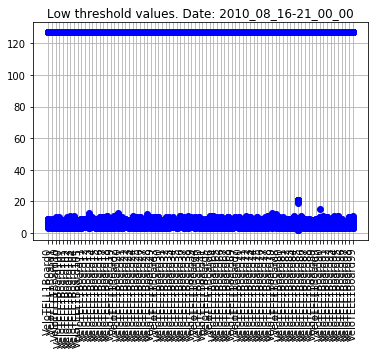

In [4]:
data2 = pd.DataFrame()
data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("low_threshold")]
data2 = data.loc[:, 2:2305]

data2.index = module_names()
data2.columns = range(2304)

fig, ax = plt.subplots()
ax.set_title('Low threshold values. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'bo')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

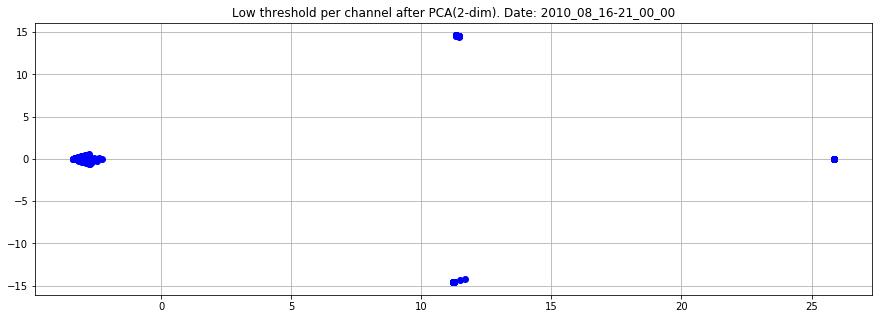

In [5]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold per channel after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

(84, 2304)


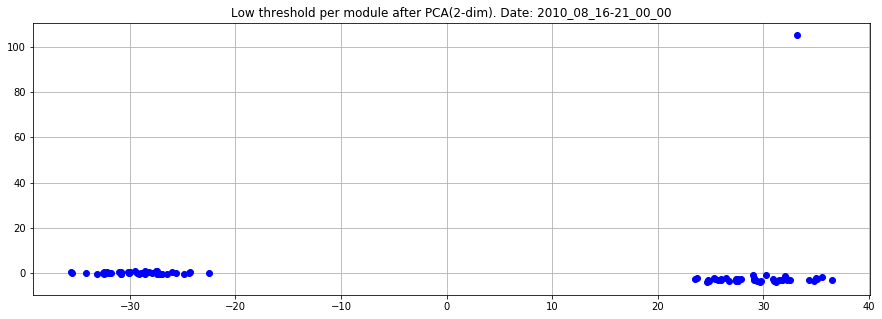

In [6]:
data_PCA = data2
print(data2.shape)
x = data_PCA.loc[:, range(2304)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Cała kalibracja

Złączono wszystkie dane kalibracyjne (low trasholds) w jedną bazę danych i przeanalizowano:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
  Dalej kształtują się cztery klastry. W dalszej części zbadane zostanie co to za elementy wchodzą w odpowiednie klastry.
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.
  Dalej kształtują się dwa klastry. W dalszej części zbadane zostanie co to za elementy wchodzą w odpowiednie klastry.

In [7]:
j_d = pd.DataFrame()
for file in data_filesT:
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    j_d = pd.concat([j_d, data.loc[:, 2:2306]], axis=1)
    #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
j_d.index = module_names()
j_d.columns = range(101376)

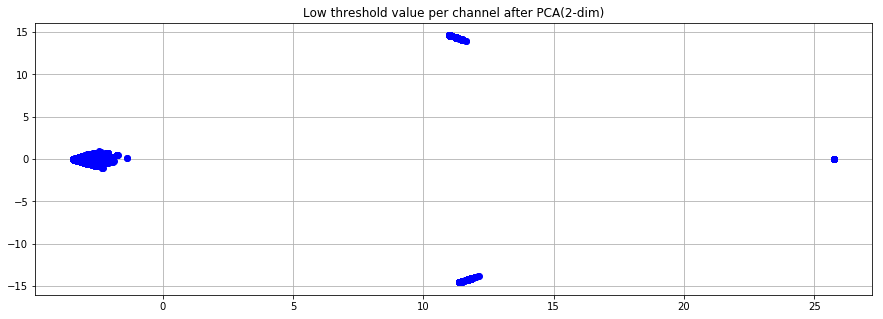

In [8]:
data_PCA = j_d.T
x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per channel after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

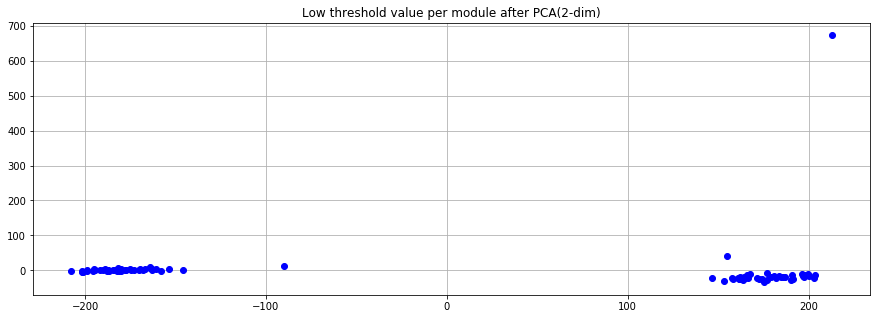

In [9]:
data_PCA = j_d

x = data_PCA.loc[:, range(101376)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

# Analiza klastrów dla wszystkich kalibracji

Dla każdej kalibracji oddzielnie sprawdzono, które z kanałów są elementami danego klastra:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.
- zbierano informacje, które z kanałów należą do odpowiedniego klastra.

Elementy, które wchodzą w dane klastry wypisano w tabeli pod wykresem.

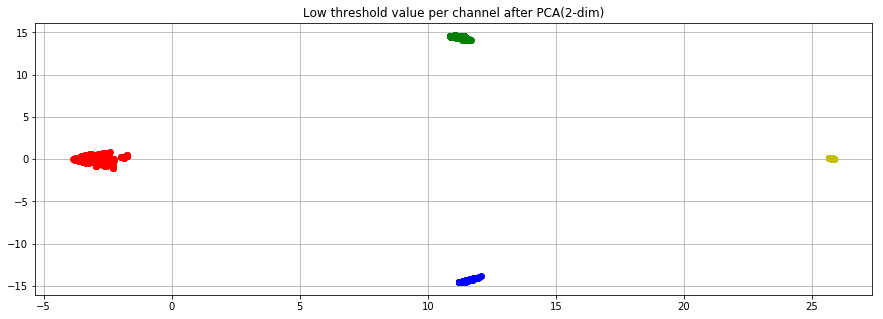

In [10]:
fig, ax = plt.subplots()
sensor_numbersR = []
sensor_numbersG = []
sensor_numbersB = []
sensor_numbersY = []
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, module_names()].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR.append(i)
        elif principalDf['pc1'][i] > 20:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'yo')
            sensor_numbersY.append(i)
        elif principalDf['pc2'][i] > 10:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbersG.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [11]:
print("Red elements {:>29} {:>25} {:>25}".format("Yellow elements", "Green elements", "Blue elements"))
print("[channel number, amount] {:>26} {:>26} {:>26}".format("[channel number, amount]", "[channel number, amount]", "[channel number, amount]"))
snR = [[x,sensor_numbersR.count(x)] for x in set(sensor_numbersR)]
snG = [[x,sensor_numbersG.count(x)] for x in set(sensor_numbersG)]
snB = [[x,sensor_numbersB.count(x)] for x in set(sensor_numbersB)]
snY = [[x,sensor_numbersY.count(x)] for x in set(sensor_numbersY)]
maxR = len(snR)
maxG = len(snG)
maxB = len(snB)
maxY = len(snY)
#print(snR[maxR-1])
#print(snR[1][0])
#print(snR[1][1])
for i in range(maxR):
    if i < maxG:
        print("[{:>14}, {:>6}]   [{:>14}, {:>6}]   [{:>14}, {:>6}]   [{:>14}, {:>6}]".format(snR[i][0], snR[i][1], snY[i][0], snY[i][1], snG[i][0], snG[i][1], snB[i][0], snB[i][1]))
    elif i >= maxG and i < maxY:
        print("[{:>14}, {:>6}]   [{:>14}, {:>6}]".format(snR[i][0], snR[i][1], snY[i][0], snY[i][1]))
    else:
        print("[{:>14}, {:>6}]".format(snR[i][0], snR[i][1]))

#for x in set(sensor_numbersR):
#    print("[{:>14}, {:>6}]".format(x, sensor_numbersR.count(x)))

Red elements               Yellow elements            Green elements             Blue elements
[channel number, amount]   [channel number, amount]   [channel number, amount]   [channel number, amount]
[             0,     44]   [           533,     44]   [           512,      2]   [           512,     42]
[             1,     44]   [           534,     44]   [           513,      2]   [           513,     42]
[             2,     44]   [           535,     44]   [           514,      2]   [           514,     42]
[             3,     44]   [           536,     44]   [           515,      2]   [           515,     42]
[             4,     44]   [           537,     44]   [           516,      2]   [           516,     42]
[             5,     44]   [           538,     44]   [           517,      2]   [           517,     42]
[             6,     44]   [           539,     44]   [           518,      2]   [           518,     42]
[             7,     44]   [           540,     44]   [  

[          1606,     44]
[          1607,     44]
[          1608,     44]
[          1609,     44]
[          1610,     44]
[          1611,     44]
[          1612,     44]
[          1613,     44]
[          1614,     44]
[          1615,     44]
[          1616,     44]
[          1617,     44]
[          1618,     44]
[          1619,     44]
[          1620,     44]
[          1621,     44]
[          1622,     44]
[          1623,     44]
[          1624,     44]
[          1625,     44]
[          1626,     44]
[          1627,     44]
[          1628,     44]
[          1629,     44]
[          1630,     44]
[          1631,     44]
[          1632,     44]
[          1633,     44]
[          1634,     44]
[          1635,     44]
[          1636,     44]
[          1637,     44]
[          1638,     44]
[          1639,     44]
[          1640,     44]
[          1641,     44]
[          1642,     44]
[          1643,     44]
[          1644,     44]
[          1645,     44]


# Analiza danych dla wszystkich kalibracji w zależności od modułu

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Wykres znacząco różni się od tego, gdzie te same dane zostały połączone w jedną bazę danych. Tutaj dane brane były oddzielnie w zależności od kalibracji. Nie widać już evidentnego podziału na dwa klastry. Dzieje się tak ponieważ dla niektórych kalibracji low tresholdy nie rozkładają się na dwa klastry. Widać to na pojedynczych kalibracjach wyświetlonych poniżej.

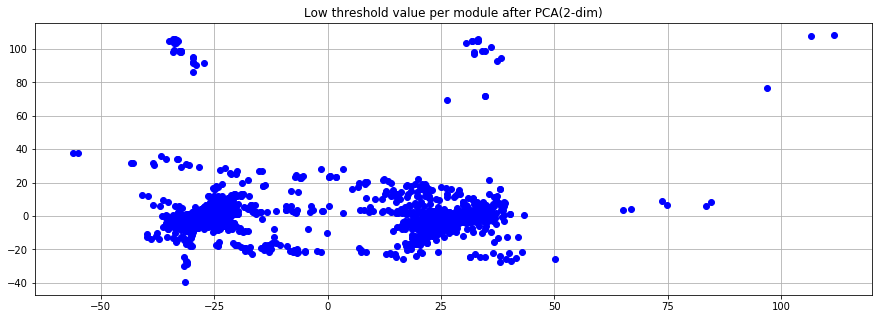

In [12]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2
    #print(data2.shape)
    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [13]:
'''
sensor_numbersB2 = []
sensor_numbersR2 = []
for file in data_filesT:
    #print(file)
    fig, ax = plt.subplots()
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_PCA = data2
    #print(data2.shape)
    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 0:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR2.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB2.append(i)
    
    plt.rcParams['figure.figsize'] = [15,5]
    ax.grid()
    plt.show()
#print(sensor_numbers)
'''

'\nsensor_numbersB2 = []\nsensor_numbersR2 = []\nfor file in data_filesT:\n    #print(file)\n    fig, ax = plt.subplots()\n    data2 = pd.DataFrame()\n    data = pd.read_csv(file ,sep=\' \', header=None, engine=\'python\', error_bad_lines=False, warn_bad_lines=False)\n    data = data[data[0].str.contains("low_threshold")]\n    data2 = data.loc[:, 2:2305]\n\n    data2.index = module_names()\n    data2.columns = range(2304)\n\n    data_PCA = data2\n    #print(data2.shape)\n    x = data_PCA.loc[:, range(2304)].values\n    x = StandardScaler().fit_transform(x)\n\n    pca = PCA(n_components=2)\n    principalComponents = pca.fit_transform(x)\n    principalDf = pd.DataFrame(data = principalComponents, columns = [\'pc1\', \'pc2\'])\n    #print(principalDf)\n\n    ax.set_title(\'Low threshold value per module after PCA(2-dim)\')\n\n    for i in principalDf.index:\n        if principalDf[\'pc1\'][i] < 0:\n            ax.plot(principalDf[\'pc1\'][i], principalDf[\'pc2\'][i], \'ro\')\n            

In [14]:
map_data_path = "../module_mapping.csv"
map_data = pd.read_csv(map_data_path ,sep=' ', engine='python', index_col=False)
map_data_R = map_data[map_data["sensor_type"] == "R"].sort_values(by=['sensor_number'])
map_data_Phi = map_data[map_data["sensor_type"] == "phi"].sort_values(by=['sensor_number'])

r_sensors_numbers = map_data_R["sensor_number"][0:42].tolist()
phi_sensors_numbers = map_data_Phi["sensor_number"].tolist()

r_sensors_names = []
for i in r_sensors_numbers:
    r_sensors_names.append("VeloTELL1Board" + str(i))

phi_sensors_names = []
for i in phi_sensors_numbers:
    phi_sensors_names.append("VeloTELL1Board" + str(i))

# Analiza low trasholdów dla wszystkich kalibracji w zależności od kanału dla modułów typu R

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.

Widać, że dane rozdzieliły się na dwie części. Jedna trochę rozlazła a druga zwarta. Elementy ze zwartej grupy wyświetlono pod wykresem.

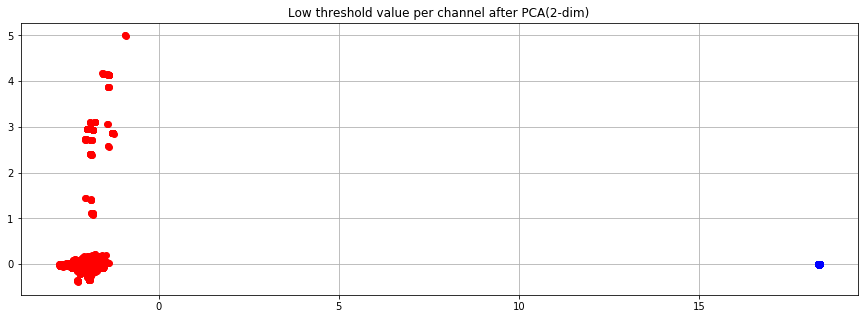

In [15]:
fig, ax = plt.subplots()
sensor_numbersR_r = []
sensor_numbersB_r = []
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR_r.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB_r.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [22]:
print("Blue elements")
print("[channel number, amount]")
snR = [[x,sensor_numbersR_r.count(x)] for x in set(sensor_numbersR_r)]
snB = [[x,sensor_numbersB_r.count(x)] for x in set(sensor_numbersB_r)]
maxR = len(snR)
maxB = len(snB)
for i in range(maxB):
    print("[{:>14}, {:>6}]".format(snB[i][0], snB[i][1]))

print("")
print("Red elements amount:")
print(maxR)


Blue elements
[channel number, amount]
[           512,     44]
[           513,     44]
[           514,     44]
[           515,     44]
[           516,     44]
[           517,     44]
[           518,     44]
[           519,     44]
[           520,     44]
[           521,     44]
[           522,     44]
[           523,     44]
[           524,     44]
[           525,     44]
[           526,     44]
[           527,     44]
[           528,     44]
[           529,     44]
[           530,     44]
[           531,     44]
[           532,     44]
[           533,     44]
[           534,     44]
[           535,     44]
[           536,     44]
[           537,     44]
[           538,     44]
[           539,     44]
[           540,     44]
[           541,     44]
[           542,     44]
[           543,     44]
[           544,     44]
[           545,     44]
[           546,     44]
[           547,     44]
[           548,     44]
[           549,     44]
[          

# Analiza low trasholdów dla wszystkich kalibracji w zależności od kanału dla modułów typu Phi

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na kanały.

Analogicznie jak dla modułów typu R, dane rozdzieliły się na dwie części. Elementy ze zwartej grupy wyświetlono pod wykresem.

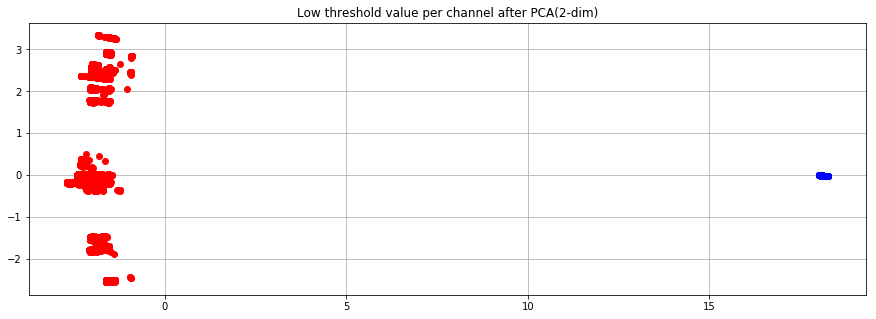

In [17]:
fig, ax = plt.subplots()
sensor_numbersR_phi = []
sensor_numbersB_phi = []
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2.T

    x = data_PCA.loc[:, names].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per channel after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] < 5:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
            sensor_numbersR_phi.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
            sensor_numbersB_phi.append(i)
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

In [21]:
print("Blue elements")
print("[channel number, amount]")
snR = [[x,sensor_numbersR_phi.count(x)] for x in set(sensor_numbersR_phi)]
snB = [[x,sensor_numbersB_phi.count(x)] for x in set(sensor_numbersB_phi)]
maxR = len(snR)
maxB = len(snB)
for i in range(maxB):
    print("[{:>14}, {:>6}]".format(snB[i][0], snB[i][1]))

print("")
print("Red elements amount:")
print(maxR)


Blue elements
[channel number, amount]
[           533,     44]
[           534,     44]
[           535,     44]
[           536,     44]
[           537,     44]
[           538,     44]
[           539,     44]
[           540,     44]
[           541,     44]
[           542,     44]
[           543,     44]
[           544,     44]
[           545,     44]
[           546,     44]
[           547,     44]
[           548,     44]
[           549,     44]
[           550,     44]
[           551,     44]
[           552,     44]
[           553,     44]
[           554,     44]
[           555,     44]
[           556,     44]
[           557,     44]
[           558,     44]
[           559,     44]
[           560,     44]
[           561,     44]
[           562,     44]
[           563,     44]
[           564,     44]
[           565,     44]
[           566,     44]
[           567,     44]
[           568,     44]
[           569,     44]
[           570,     44]
[          

# Analiza low trasholdów dla wszystkich kalibracji w zależności od modułów

Dla każdej kalibracji oddzielnie sprawdzono, jak rozkładają się dane:
- korzystając z metody PCA zredukowano wymiar danych do dwóch wymiarów, rzutując na moduły.

Po podziale na typ modułu oraz zrzutowaniu na moduły w modułach typu R nie widać podziału na grupy. Natomiast w modułach typu Phi można zauważyć grupę w centrum oraz okrąg wokół tej grupy.

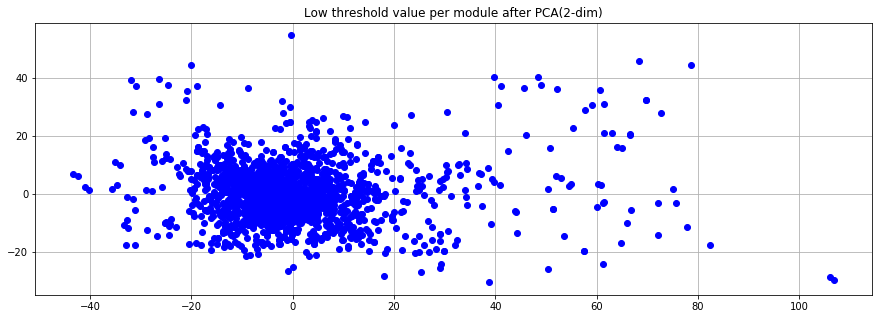

In [19]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data = data[pd.DataFrame(data[1].tolist()).isin(r_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2
    #print(data2.shape)
    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)

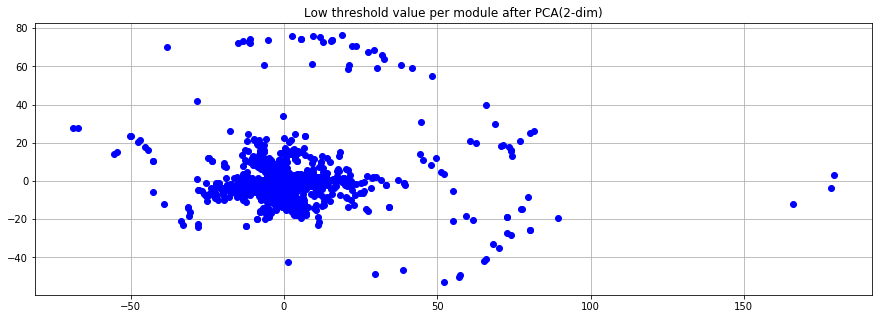

In [20]:
fig, ax = plt.subplots()
for file in data_filesT:
    #print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    data = data[pd.DataFrame(data[1].tolist()).isin(phi_sensors_names).any(1)]
    names = data[1].tolist()
    data2 = data.loc[:, 2:2305]

    data2.index = names
    data2.columns = range(2304)

    data_PCA = data2
    #print(data2.shape)
    x = data_PCA.loc[:, range(2304)].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Low threshold value per module after PCA(2-dim)')

    for i in principalDf.index:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'bo')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
#print(sensor_numbers)